<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Apellidos, Nombres** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
!pip install biopython
!pip install reportlab
!pip install nglview
from Bio import Entrez
from Bio import SeqIO
import re
import csv 
import re
import pandas as pd 
from collections import Counter

In [2]:
import miningscience as msc
msc.download_pubmed
msc.mining_pubs
help(msc)

Help on module miningscience:

NAME
    miningscience

FUNCTIONS
    download_pubmed(keyword)
        cargar y buscar la data de NCBI de cualquier caracter al que se le defina como keyword
    
    mining_pubs(tipo)
        Carga el archivo de pubmed y se lee tipo texto y busca los titulos DP, AU, AD y ordena su informacion segun parametros independientes

FILE
    c:\users\lenovo\videos\e2_examenparcial_python\miningscience.py





## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador Genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
keyword = "Ecuador Genomics"#defino la keyword de busqueda que me va a comunicar con la funcion guardada en el archivo .py
import miningscience as msc
pr= msc.download_pubmed
pr(keyword)

El número de artículos es:
55


In [5]:
#### parte 2

In [4]:
with open('data/summary-ecuadorgen-set.txt', encoding="utf8") as f:## llamo al archivo descargado que contiene la informacion de la busqueda en NCBI de Ecuador Genomics
    my_text = f.read()
# reemplaze las iteraciones y las uní en una sola linea para poder encontrarlas rapido
my_text = re.sub(r'\n\s{6}', ' ', my_text)


In [5]:
m = re.findall(r"(PMID:\s\w+)", my_text)##busco con expresiones regulares la primera entrada PMID de la primera publicacion
print('El PMID del primer artículo es:')
print(m[:1])#defino solamente que me imprima el PMID del primer articulo

El PMID del primer artículo es:
['PMID: 19844075']


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [13]:
# Escriba aquí su código para el ejercicio 3


'C:\\Users\\LENOVO\\Videos\\E2_ExamenParcial_Python'

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


In [4]:
# Escriba aquí su código para el ejercicio 4

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [21]:
# Escriba aquí su código para el ejercicio 6
with open("data/sequence.seq") as s:#llamo a la base de datos donde estan las IDs
    Entrez.email = "allan.farinango@est.ikiam.edu.ec" 
    with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id='MW196737.1, MW196736.1, MW196735.1, MW196734.1, MW196733.1, MW196732.1, MW196731.1, MW196730.1, MW196729.1, MW196728.1'
                  ) as handle: #llamo a las 10 primeras secuencias de modo gb 
        for seq_record in SeqIO.parse(handle, "gb"): 
            print("%s %s..." % (seq_record.id, seq_record.description[:100])) 
            print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                                  len(seq_record.features), 
                                                                  seq_record.annotations["source"], ) )



MW196737.1 Echovirus E30 isolate E30/COR/ARG/Mar_2017_24 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196736.1 Echovirus E30 isolate E30/COR/ARG/Mar_2017_145 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196735.1 Echovirus E30 isolate E30/COR/ARG/Apr_2017_14 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196734.1 Echovirus E30 isolate E30/FB/URY/Jun_2017_OTU-G capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196733.1 Echovirus E30 isolate E30/BU/URY/Jun_2017_OTU-E capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196732.1 Echovirus E30 isolate E30/BU/URY/Jun_2017_OTU-D capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196731.1 Echovirus E30 isolate E30/FB/URY/Jul_2017_OTU-H capsid protein VP1 gene, partial c

In [15]:
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os

In [16]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"##creo los dos archivos que me ayudan a crear el dendograma
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=data/sequence.fasta


In [48]:
ClustalAlign = AlignIO.read("data/sequence.aln", "clustal")#nucleotidos parecidos entre las especies identificadas por IDs
print(ClustalAlign[:10])##  10 primeros clados filogeneticos

Alignment with 10 rows and 337 columns
CACACCTCACAGGTGGTACCGAGTGACACAATGCAGACACGGCA...GTA MW196729.1
CACACCTCACAGGTGGTACCGAGTGACACAATGCAGACACGGCA...GTA MW196723.1
CACACCTCACAGGTGGTACCGAGTGACACAATGCAGACACGGCA...GTA MW196714.1
---------CAAGTGGTACCTGGTGACACAATGCAGACACGGCA...GTA MW196735.1
CACACCTCACAGGTGGTACCGAGTGACACAATGCAGACACGGCA...GTA MW196727.1
CACACCTCACAGGTGGTACCGAGTGACACAATGCAGACACGGCA...GTA MW196721.1
CACACGTCACAAGTGGTACCGAGTGACACAATGCAGACACGACA...GTG MW196722.1
CACACGTCACAAGTGGTACCGAGTGATACAATGCAGACACGACA...GTG MW196716.1
CATACATCACAAGTGGTACCGAGTGACACAATGCAGACACGACA...GTG MW196718.1
CATACATCACAAGTGGTGCCAAGTGACACCATCCAGACACGCCA...GTG MW196715.1


<class 'Bio.Align.MultipleSeqAlignment'>


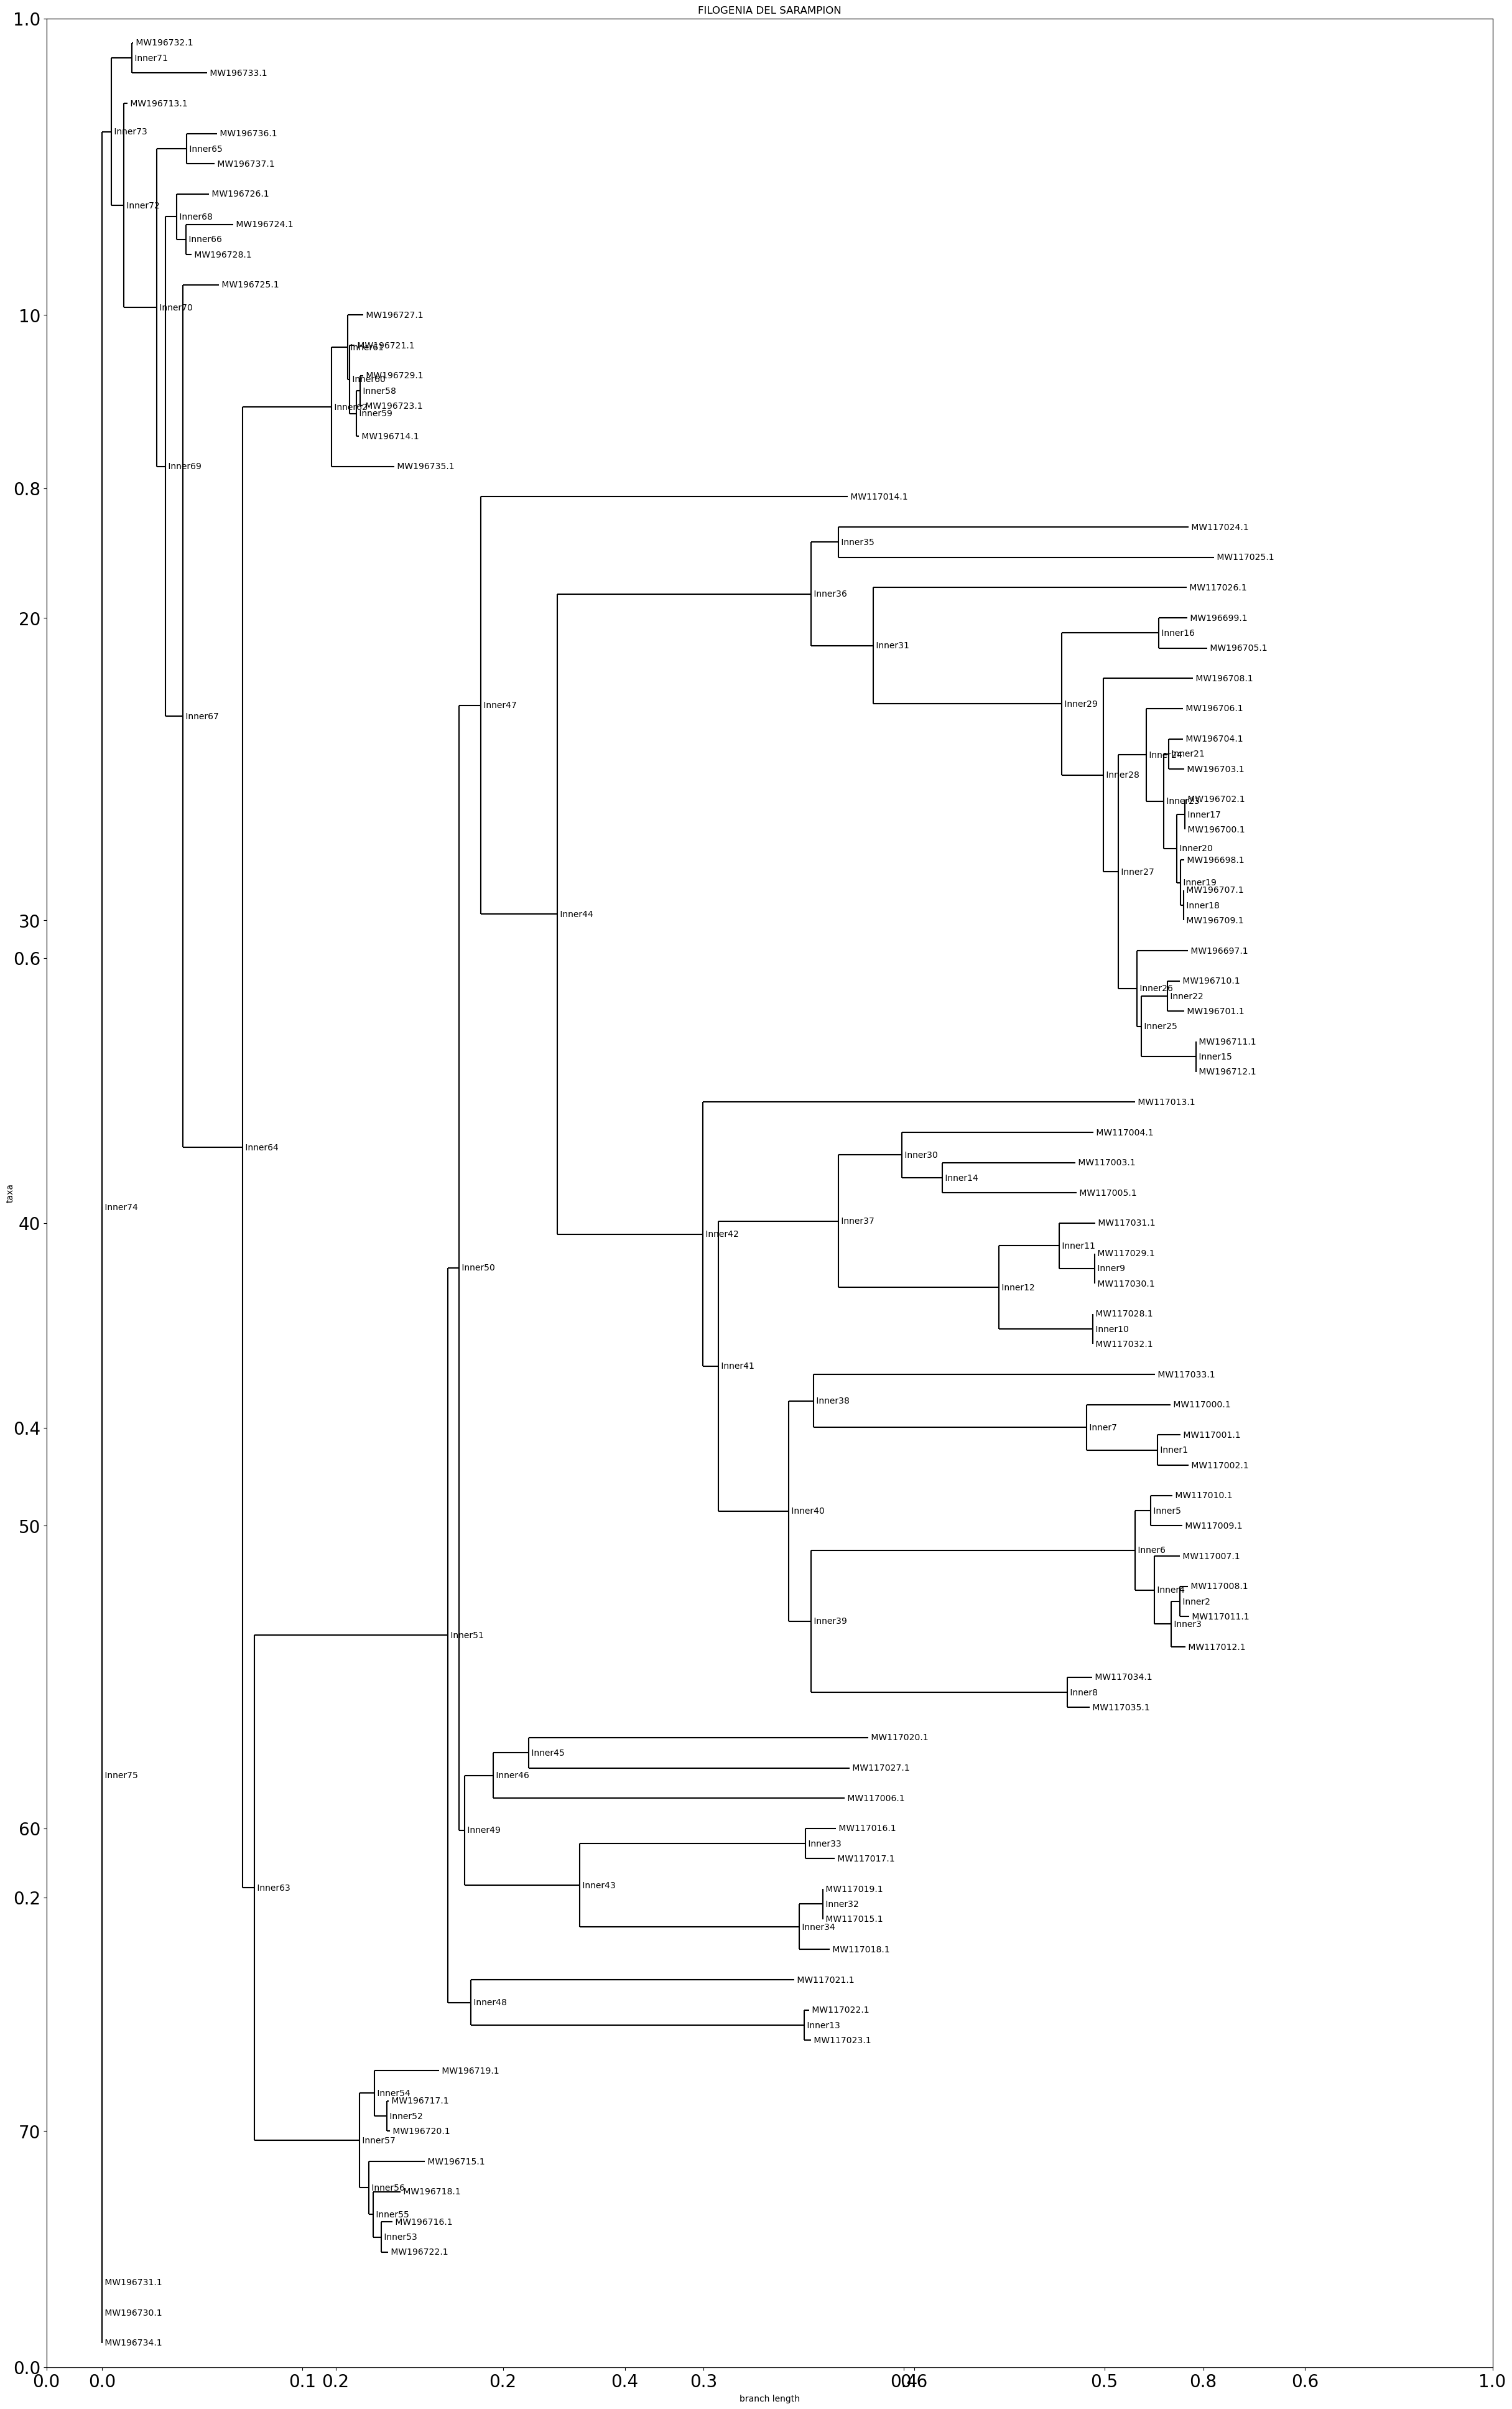

In [51]:
## REALIZO EL ARBOL DE TODOS LOS DATOS PORQUE SE VE MAS CHEVERE
from Bio import Phylo##CREACION del dendograma osea la separacion por clados de la filogenia de cada sepa del virus sarampion
tree = Phylo.read("data/sequence.dnd", "newick")
#----Phylo.draw_ascii(tree)## PARA imprimir el borrador del arbol 
#se llama al archivo .aln creado en la descarga de la data en el paso anterior
with open("data/sequence.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))## PARA imprimir el borrador del arbol 
# calcular las distancias mediante Distance Calculator
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)## se calcula la matriz de distancias

# funcion para construccion del arbol filogenetico 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True

# Guardar el arbol 
Phylo.write(staphy1_tree, "data/sequence.xml", "phyloxml")
arsequence = Phylo.read(file="data/sequence.xml", format= "phyloxml")

# Arbol  en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#Para tener eficiente visualización se utiliza el siguiente código 
fig = plt.figure(figsize=(30, 50), dpi=100) ## configuro el tamaño de imagen y la densidad de pixeles del mismo cuando guarde como imagen
# configuro el tamaño del cuadro en X Y Z para que no se sobrepongan los datos
matplotlib.rc('font', size=10)              
matplotlib.rc('xtick', labelsize=20)       
matplotlib.rc('ytick', labelsize=20) 
## encabezado de imagen
plt.title("FILOGENIA DEL SARAMPION") 
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(arsequence, axes=axes)
fig.savefig("data/sequence.png")

**todas las sepas del virus sarampion tuvieron un ancestro en comun y a traves del tiempo y las condiciones que eligieron para radicarse han ido separandose en diferentes sepas desde un ancestro comun o clado filogenetico, entre mas adelante esta la especie mas alejado de las ramas principales de los clados de la que se separaron.
en cuanto al codigo se eligieron las especies de sarampion para realizar la filogenia de las diferentes sepas y se graficaron a modo de separacion filogenetica**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```